In [ ]:
import numpy as np 
import matplotlib as mp
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2 as cv

In [ ]:
!ls

drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/Neural Network Project/ 

/content/drive/MyDrive/Neural Network Project


1. Conversion of image into 2D numpy array and back  
    
    A) Method 1: Using matplotlib 

In [ ]:
im = mp.image.imread("DrStrange.jpg")
print(type(im))

<class 'numpy.ndarray'>


In [ ]:
im

array([[[ 80,  72,  69],
        [ 79,  69,  67],
        [ 82,  72,  70],
        ...,
        [ 38,  39,  44],
        [ 40,  41,  46],
        [ 38,  39,  44]],

       [[ 83,  75,  72],
        [ 83,  75,  72],
        [ 88,  78,  76],
        ...,
        [ 39,  40,  45],
        [ 42,  43,  48],
        [ 37,  38,  43]],

       [[ 88,  80,  77],
        [ 92,  84,  81],
        [ 91,  83,  80],
        ...,
        [ 40,  41,  46],
        [ 41,  42,  47],
        [ 38,  39,  44]],

       ...,

       [[210, 108, 121],
        [198,  98, 110],
        [193,  93, 105],
        ...,
        [ 66,  65,  71],
        [ 63,  62,  68],
        [ 70,  69,  75]],

       [[206, 100, 114],
        [197,  95, 108],
        [190,  88, 101],
        ...,
        [ 67,  68,  73],
        [ 63,  62,  68],
        [ 71,  70,  76]],

       [[201,  95, 107],
        [194,  92, 105],
        [191,  89, 102],
        ...,
        [ 69,  70,  75],
        [ 67,  66,  72],
        [ 78,  77,  82]]

<class 'matplotlib.image.AxesImage'>


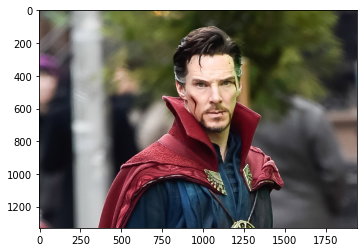

In [ ]:
im2 = mp.pyplot.imshow(im)
print(type(im2))

1.

  B) Method 2: Using Keras

In [ ]:
image = load_img("DrStrange.jpg")
i2a = img_to_array(image)
print(type(i2a))

<class 'numpy.ndarray'>


In [ ]:
i2a

array([[[ 80.,  72.,  69.],
        [ 79.,  69.,  67.],
        [ 82.,  72.,  70.],
        ...,
        [ 38.,  39.,  44.],
        [ 40.,  41.,  46.],
        [ 38.,  39.,  44.]],

       [[ 83.,  75.,  72.],
        [ 83.,  75.,  72.],
        [ 88.,  78.,  76.],
        ...,
        [ 39.,  40.,  45.],
        [ 42.,  43.,  48.],
        [ 37.,  38.,  43.]],

       [[ 88.,  80.,  77.],
        [ 92.,  84.,  81.],
        [ 91.,  83.,  80.],
        ...,
        [ 40.,  41.,  46.],
        [ 41.,  42.,  47.],
        [ 38.,  39.,  44.]],

       ...,

       [[210., 108., 121.],
        [198.,  98., 110.],
        [193.,  93., 105.],
        ...,
        [ 66.,  65.,  71.],
        [ 63.,  62.,  68.],
        [ 70.,  69.,  75.]],

       [[206., 100., 114.],
        [197.,  95., 108.],
        [190.,  88., 101.],
        ...,
        [ 67.,  68.,  73.],
        [ 63.,  62.,  68.],
        [ 71.,  70.,  76.]],

       [[201.,  95., 107.],
        [194.,  92., 105.],
        [191.,  

In [ ]:
a2i = array_to_img(i2a)
print(type(a2i))

<class 'PIL.Image.Image'>


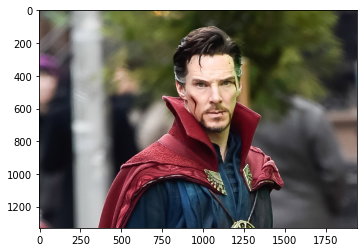

In [ ]:
mp.pyplot.imshow(a2i)

2. Basic CNN network to classify different tumor types 

In [ ]:
% cd /content/drive/MyDrive/Neural Network Project/mri_dataset/

/content/drive/MyDrive/Neural Network Project/mri_dataset


In [ ]:
!ls


Testing  Training


In [ ]:
import os
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import torch.optim as optim


from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

#mridata = (os.listdir("/content/drive/MyDrive/Neural Network Project/mri_dataset"))

In [ ]:
data_dir = "/content/drive/MyDrive/Neural Network Project"
folder_name = "mri_dataset"
image_folders = os.path.join(data_dir, folder_name)

transform = transforms.Compose([transforms.Resize((200, 200)), transforms.ToTensor()])
images = []
for file in os.listdir(image_folders):
    try:
      images.append(ImageFolder(os.path.join(image_folders, file), transform=transform))
    except:
      print(file)
datasets = torch.utils.data.ConcatDataset(images)

In [ ]:
i=0
for dataset in datasets.datasets:
    if i==0:
        result = Counter(dataset.targets)
        i += 1
    else:
        result += Counter(dataset.targets)

result = dict(result)
print("""Total Number of Images for each Class:
    Class 0 (glioma_tumor): {}
    Class 1 (meningioma_tumor): {}
    Class 2 (no_tumor): {}
    Class 3 (pituitary_tumor): {}""".format(result[0], result[1], result[2], result[3]))

Total Number of Images for each Class:
    Class 0 (glioma_tumor): 926
    Class 1 (meningioma_tumor): 937
    Class 2 (no_tumor): 500
    Class 3 (pituitary_tumor): 901


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2

import os


# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [ ]:
images = []
labels = [] 
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Training/glioma_tumor/"):
    label = "glioma_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Testing/glioma_tumor/"):
    label = "glioma_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Training/meningioma_tumor/"):
    label = "meningioma_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Testing/meningioma_tumor/"):
    label = "meningioma_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Training/no_tumor/"):
    label = "no_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Testing/no_tumor/"):
    label = "no_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Training/pituitary_tumor/"):
    label = "pituitary_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)
for dir_path in glob.glob("/content/drive/MyDrive/Neural Network Project/mri_dataset/Testing/pituitary_tumor/"):
    label = "pituitary_tumor"
    for image_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (200, 200))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        images.append(image)
        labels.append(label)

In [ ]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [ ]:
id_to_label_dict

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

In [ ]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [ ]:
np.shape(images), label_ids.shape, np.shape(labels)

((3264, 200, 200, 3), (3264,), (3264,))

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(images,label_ids, test_size = 0.20)  

In [ ]:
X_train

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        ...,
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [5, 5, 5],
         [3, 3, 3],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[ 4,  4,  4],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]

In [ ]:
y_train

array([3, 3, 2, ..., 3, 3, 2])

In [ ]:
#Normalize color values to between 0 and 1
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)


#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 200*200*3)
X_flat_test = X_test.reshape(X_test.shape[0], 200*200*3)

In [ ]:
#One Hot Encode the Output
y_train = keras.utils.np_utils.to_categorical(y_train, 4)
y_test = keras.utils.np_utils.to_categorical(y_test, 4)

print('Original Sizes:', np.shape(X_train),np.shape(X_test), np.shape(y_train), np.shape(y_test))
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (2611, 200, 200, 3) (653, 200, 200, 3) (2611, 4) (653, 4)
Flattened: (2611, 120000) (653, 120000)


(200, 200, 3)


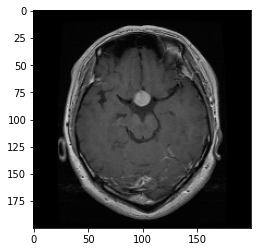

In [ ]:
print(X_train[5].shape)
plt.imshow(X_train[5])
plt.show()